<a href="https://colab.research.google.com/github/ohallao/MoneyBall-Brasileirao/blob/main/MoneyBall_Braisleirao_Atacantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!apt-get install -y chromium-chromedriver

In [2]:
#!pip install soccerdata

In [3]:
import soccerdata as sd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import time
import requests

[12/01/24 22:32:33] INFO     No custom team name replacements found. You can configure these in       ]8;id=265048;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=344057;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_config.py#90\90]8;;\
                             /root/soccerdata/config/teamname_replacements.json.                                   

                    INFO     Custom league dict loaded from                                          ]8;id=445793;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=125283;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_config.py#194\194]8;;\
                             /root/soccerdata/config/league_dict.json.                                             

In [4]:
sd.FBref.available_leagues()

['BRA-Serie A',
 'Big 5 European Leagues Combined',
 'ENG-Premier League',
 'ESP-La Liga',
 'FRA-Ligue 1',
 'GER-Bundesliga',
 'INT-European Championship',
 "INT-Women's World Cup",
 'INT-World Cup',
 'ITA-Serie A']

In [5]:
fbref = sd.FBref(leagues="BRA-Serie A", seasons=2024)
print(fbref.__doc__)

[12/01/24 22:32:35] INFO     Saving cached data to /root/soccerdata/data/FBref                       ]8;id=15410;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=290798;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_common.py#263\263]8;;\

Provides pd.DataFrames from data at http://fbref.com.

    Data will be downloaded as necessary and cached locally in
    ``~/soccerdata/data/FBref``.

    Parameters
    ----------
    leagues : string or iterable, optional
        IDs of leagues to include. For efficiently reading data from the Top-5
        European leagues, use "Big 5 European Leagues Combined".
    seasons : string, int or list, optional
        Seasons to include. Supports multiple formats.
        Examples: '16-17'; 2016; '2016-17'; [14, 15, 16]
    proxy : 'tor' or dict or list(dict) or callable, optional
        Use a proxy to hide your IP address. Valid options are:
            - "tor": Uses the Tor network. Tor should be running in
              the background on port 9050.
            - dict: A dictionary with the proxy to use. The dict should be
              a mapping of supported protocols to proxy addresses. For example::

                  {
                      'http': 'http://10.10.1.10:3128',
     

In [6]:
# 1 - Join player_season_misc + player_season_std
 #por nome ou idade

# Filtrar jogadores com pelo menos 600 minutos jogados

# Remover goleiros (GK) e Zagueiros (DF)

#2- Selecionar as colunas   ('Playing Time', 'Min'),
#    ('Progression', 'PrgR'),
#    ('Expected', 'xG'),
#    ('Expected', 'xAG'),
#    ('Performance', 'G-PK'),
#    ('Performance', 'Ast'),
#    ('Progression', 'PrgC'),
#    ('Progression', 'PrgP')
#    ('Aerial Duels', 'Won%'),
#    ('Aerial Duels', 'Won'),
#    ('Aerial Duels', 'Lost')

In [7]:
player_season_std = fbref.read_player_season_stats(stat_type="standard")
player_season_std.head()

/usr/local/lib/python3.10/dist-packages/soccerdata/fbref.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat(dfs)
/usr/local/lib/python3.10/dist-packages/soccerdata/_common.py:145: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


nation    pos     age  \
                                                                           
league      season team           player                                   
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio    URU  FW,MF  26-061   
                                  Alex Santana        BRA  MF,FW  29-202   
                                  Bento               BRA     GK  25-174   
                                  Bruno Praxedes      BRA  MF,FW  22-297   
                                  Bruno Zapelli       ARG  MF,FW  22-198   

                                                    born Playing Time         \
                                                                   MP Starts   
league      season team           player                                       
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  1998           17     13   
                                  Alex Santana      1995            4      0   
                                  Bento             1999            7      7   
                                  Bruno Praxedes    2002            7      2   
                                  Bruno Zapelli     2002           31     16   

                                                               Performance  \
                                                     Min   90s         Gls   
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  1065  11.8           4   
                                  Alex Santana       101   1.1           0   
                                  Bento              630   7.0           0   
                                  Bruno Praxedes     237   2.6           0   
                                  Bruno Zapelli     1384  15.4           0   

                                                        ... Per 90 Minutes  \
                                                   Ast  ...            Gls   
league      season team           player                ...                  
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio   1  ...           0.34   
                                  Alex Santana       0  ...            0.0   
                                  Bento              0  ...            0.0   
                                  Bruno Praxedes     0  ...            0.0   
                                  Bruno Zapelli      4  ...            0.0   

                                                                             \
                                                     Ast   G+A  G-PK G+A-PK   
league      season team           player                                      
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  0.08  0.42  0.34   0.42   
                                  Alex Santana       0.0   0.0   0.0    0.0   
                                  Bento              0.0   0.0   0.0    0.0   
                                  Bruno Praxedes     0.0   0.0   0.0    0.0   
                                  Bruno Zapelli     0.26  0.26   0.0   0.26   

                                                                             \
                                                      xG   xAG xG+xAG  npxG   
league      season team           player                                      
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  0.27  0.19   0.45  0.27   
                                  Alex Santana      0.06   0.0   0.06  0.06   
                                  Bento              0.0   0.0    0.0   0.0   
                                  Bruno Praxedes    0.03  0.12   0.15  0.03   
                                  Bruno Zapelli     0.24  0.27   0.51  0.24   

                                                             
                                                   npxG+xAG  
league      season team           player                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio     0.45  
                                  Ale

In [8]:
player_season_std = player_season_std.reset_index()
print(player_season_std.columns)
player_season_std.head()

MultiIndex([(        'league',         ''),
            (        'season',         ''),
            (          'team',         ''),
            (        'player',         ''),
            (        'nation',         ''),
            (           'pos',         ''),
            (           'age',         ''),
            (          'born',         ''),
            (  'Playing Time',       'MP'),
            (  'Playing Time',   'Starts'),
            (  'Playing Time',      'Min'),
            (  'Playing Time',      '90s'),
            (   'Performance',      'Gls'),
            (   'Performance',      'Ast'),
            (   'Performance',      'G+A'),
            (   'Performance',     'G-PK'),
            (   'Performance',       'PK'),
            (   'Performance',    'PKatt'),
            (   'Performance',     'CrdY'),
            (   'Performance',     'CrdR'),
            (      'Expected',       'xG'),
            (      'Expected',     'npxG'),
            (      'Expected',  

league season            team            player nation    pos     age  \
                                                                                
0  BRA-Serie A   2425  Ath Paranaense  Agustín Canobbio    URU  FW,MF  26-061   
1  BRA-Serie A   2425  Ath Paranaense      Alex Santana    BRA  MF,FW  29-202   
2  BRA-Serie A   2425  Ath Paranaense             Bento    BRA     GK  25-174   
3  BRA-Serie A   2425  Ath Paranaense    Bruno Praxedes    BRA  MF,FW  22-297   
4  BRA-Serie A   2425  Ath Paranaense     Bruno Zapelli    ARG  MF,FW  22-198   

   born Playing Time         ... Per 90 Minutes                           \
                  MP Starts  ...            Gls   Ast   G+A  G-PK G+A-PK   
0  1998           17     13  ...           0.34  0.08  0.42  0.34   0.42   
1  1995            4      0  ...            0.0   0.0   0.0   0.0    0.0   
2  1999            7      7  ...            0.0   0.0   0.0   0.0    0.0   
3  2002            7      2  ...            0.0   0.0   0.0   0.0    0.0   
4  2002           31     16  ...            0.0  0.26  0.26   0.0   0.26   

                                     
     xG   xAG xG+xAG  npxG npxG+xAG  
0  0.27  0.19   0.45  0.27     0.45  
1  0.06   0.0   0.06  0.06     0.06  
2   0.0   0.0    0.0   0.0      0.0  
3  0.03  0.12   0.15  0.03     0.15  
4  0.24  0.27   0.51  0.24     0.51  

[5 rows x 37 columns]

In [9]:
player_season_misc = fbref.read_player_season_stats(stat_type="misc")
player_season_misc.head()

/usr/local/lib/python3.10/dist-packages/soccerdata/fbref.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat(dfs)
/usr/local/lib/python3.10/dist-packages/soccerdata/_common.py:145: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


nation    pos     age  \
                                                                           
league      season team           player                                   
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio    URU  FW,MF  26-061   
                                  Alex Santana        BRA  MF,FW  29-202   
                                  Bento               BRA     GK  25-174   
                                  Bruno Praxedes      BRA  MF,FW  22-297   
                                  Bruno Zapelli       ARG  MF,FW  22-198   

                                                    born   90s Performance  \
                                                                      CrdY   
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  1998  11.8           5   
                                  Alex Santana      1995   1.1           2   
                                  Bento             1999   7.0           1   
                                  Bruno Praxedes    2002   2.6           0   
                                  Bruno Zapelli     2002  15.4           3   

                                                                       ...  \
                                                   CrdR 2CrdY Fls Fld  ...   
league      season team           player                               ...   
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio    1     1  14  24  ...   
                                  Alex Santana        0     0   3   1  ...   
                                  Bento               0     0   1   0  ...   
                                  Bruno Praxedes      0     0   8   2  ...   
                                  Bruno Zapelli       0     0  19  18  ...   

                                                                             \
                                                   Crs Int TklW PKwon PKcon   
league      season team           player                                      
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  29   4   16     0     0   
                                  Alex Santana       0   0    0     0     0   
                                  Bento              0   0    0     0     1   
                                  Bruno Praxedes     7   2    4     0     0   
                                  Bruno Zapelli     91   8   19     0     0   

                                                            Aerial Duels       \
                                                   OG Recov          Won Lost   
league      season team           player                                        
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  0    61            6    7   
                                  Alex Santana      0     6            2    4   
                                  Bento             0     4            2    0   
                                  Bruno Praxedes    0    13            3    2   
                                  Bruno Zapelli     0    70            4   17   

                                                           
                                                     Won%  
league      season team           player                   
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio   46.2  
                                  Alex Santana       33.3  
                                  Bento             100.0  
                                  Bruno Praxedes     60.0  
                                  Bruno Zapelli      19.0  

[5 rows x 21 columns]

In [10]:
player_season_misc = player_season_misc.reset_index()
print(player_season_misc.columns)
player_season_misc.head()

MultiIndex([(      'league',      ''),
            (      'season',      ''),
            (        'team',      ''),
            (      'player',      ''),
            (      'nation',      ''),
            (         'pos',      ''),
            (         'age',      ''),
            (        'born',      ''),
            (         '90s',      ''),
            ( 'Performance',  'CrdY'),
            ( 'Performance',  'CrdR'),
            ( 'Performance', '2CrdY'),
            ( 'Performance',   'Fls'),
            ( 'Performance',   'Fld'),
            ( 'Performance',   'Off'),
            ( 'Performance',   'Crs'),
            ( 'Performance',   'Int'),
            ( 'Performance',  'TklW'),
            ( 'Performance', 'PKwon'),
            ( 'Performance', 'PKcon'),
            ( 'Performance',    'OG'),
            ( 'Performance', 'Recov'),
            ('Aerial Duels',   'Won'),
            ('Aerial Duels',  'Lost'),
            ('Aerial Duels',  'Won%')],
           )


league season            team            player nation    pos     age  \
                                                                                
0  BRA-Serie A   2425  Ath Paranaense  Agustín Canobbio    URU  FW,MF  26-061   
1  BRA-Serie A   2425  Ath Paranaense      Alex Santana    BRA  MF,FW  29-202   
2  BRA-Serie A   2425  Ath Paranaense             Bento    BRA     GK  25-174   
3  BRA-Serie A   2425  Ath Paranaense    Bruno Praxedes    BRA  MF,FW  22-297   
4  BRA-Serie A   2425  Ath Paranaense     Bruno Zapelli    ARG  MF,FW  22-198   

   born   90s Performance  ...                                   Aerial Duels  \
                     CrdY  ... Crs Int TklW PKwon PKcon OG Recov          Won   
0  1998  11.8           5  ...  29   4   16     0     0  0    61            6   
1  1995   1.1           2  ...   0   0    0     0     0  0     6            2   
2  1999   7.0           1  ...   0   0    0     0     1  0     4            2   
3  2002   2.6           0  ...   7   2    4     0     0  0    13            3   
4  2002  15.4           3  ...  91   8   19     0     0  0    70            4   

               
  Lost   Won%  
0    7   46.2  
1    4   33.3  
2    0  100.0  
3    2   60.0  
4   17   19.0  

[5 rows x 25 columns]

In [11]:
# 1. Achatar o MultiIndex para facilitar a manipulação
player_season_std.columns = ['_'.join(col).strip() for col in player_season_std.columns]
player_season_misc.columns = ['_'.join(col).strip() for col in player_season_misc.columns]

# 2. Verificar os novos nomes das colunas
print(player_season_std.columns)
print(player_season_misc.columns)

# 3. Selecionar as colunas desejadas de cada DataFrame
df_std_selected = player_season_std[
    ['player_', 'team_','pos_','Playing Time_Min', 'Progression_PrgR', 'Expected_xG', 'Expected_xAG', 'Performance_G-PK', 'Performance_Ast', 'Progression_PrgC', 'Progression_PrgP']
]
df_misc_selected = player_season_misc[
    ['player_', 'team_', 'Aerial Duels_Won%', 'Aerial Duels_Won', 'Aerial Duels_Lost']
]

# 4. Realizar o merge dos dois DataFrames com base nas colunas 'player' e 'team'
df_merged = pd.merge(df_std_selected, df_misc_selected, on=['player_', 'team_'], how='inner')

# 5. Exibir o resultado
print(df_merged.head())

Index(['league_', 'season_', 'team_', 'player_', 'nation_', 'pos_', 'age_',
       'born_', 'Playing Time_MP', 'Playing Time_Starts', 'Playing Time_Min',
       'Playing Time_90s', 'Performance_Gls', 'Performance_Ast',
       'Performance_G+A', 'Performance_G-PK', 'Performance_PK',
       'Performance_PKatt', 'Performance_CrdY', 'Performance_CrdR',
       'Expected_xG', 'Expected_npxG', 'Expected_xAG', 'Expected_npxG+xAG',
       'Progression_PrgC', 'Progression_PrgP', 'Progression_PrgR',
       'Per 90 Minutes_Gls', 'Per 90 Minutes_Ast', 'Per 90 Minutes_G+A',
       'Per 90 Minutes_G-PK', 'Per 90 Minutes_G+A-PK', 'Per 90 Minutes_xG',
       'Per 90 Minutes_xAG', 'Per 90 Minutes_xG+xAG', 'Per 90 Minutes_npxG',
       'Per 90 Minutes_npxG+xAG'],
      dtype='object')
Index(['league_', 'season_', 'team_', 'player_', 'nation_', 'pos_', 'age_',
       'born_', '90s_', 'Performance_CrdY', 'Performance_CrdR',
       'Performance_2CrdY', 'Performance_Fls', 'Performance_Fld',
       'Performan

In [12]:
# Filtrar jogadores com pelo menos 600 minutos jogados
filtered_data = df_merged[df_merged[('Playing Time_Min')] >= 600]

# Filtrar para remover goleiros (GK) e zagueiros (DF)
filtered_data = filtered_data[
    ~filtered_data[('pos_')].str.contains('GK|DF', na=False)
]

# Exibir as primeiras linhas para confirmar a filtragem
print(filtered_data.head())


            player_           team_   pos_  Playing Time_Min  \
0  Agustín Canobbio  Ath Paranaense  FW,MF              1065   
4     Bruno Zapelli  Ath Paranaense  MF,FW              1384   
5         Christian  Ath Paranaense  MF,FW              1366   
7             Erick  Ath Paranaense     MF              2373   
8       Fernandinho  Ath Paranaense     MF              1430   

   Progression_PrgR  Expected_xG  Expected_xAG  Performance_G-PK  \
0               121          3.1           2.2                 4   
4               114          3.7           4.1                 0   
5                96          1.5           1.8                 1   
7                39          3.5           1.4                 2   
8                36          1.6           2.4                 1   

   Performance_Ast  Progression_PrgC  Progression_PrgP  Aerial Duels_Won%  \
0                1                43                52               46.2   
4                4                37                

In [13]:
# Selecionar as colunas desejadas para análise
striker = filtered_data[[
    ('player_'),
    ('team_'),
    ('pos_'),
    ('Playing Time_Min'),
    ('Progression_PrgR'),
    ('Expected_xG'),
    ('Expected_xAG'),
    ('Performance_G-PK'),
    ('Performance_Ast'),
    ('Progression_PrgC'),
    ('Progression_PrgP'),
    ('Aerial Duels_Won%'),
    ('Aerial Duels_Won'),
    ('Aerial Duels_Lost'),
]]

# Renomear as colunas para facilitar o uso
striker.columns = ['jogador','time','posicao', 'Minutos', 'PrgR', 'xG', 'xAG', 'G-PK', 'Assistencias', 'PrgC', 'PrgP','Aerial Duel%','Aerial Duel Won','Aerial Duel Lost']

# Exibir as primeiras linhas para confirmar a seleção de colunas
print(striker.head())


# Criar a nova coluna 'Aerial Duels ' no formato "50% (10/10)"
striker['Aerial Duels '] = (
    striker['Aerial Duel%'].astype(str) + '% (' +
    striker['Aerial Duel Won'].astype(str) + '/' +
    striker['Aerial Duel Lost'].astype(str) + ')')

# Criar uma nova coluna 'Acoes_Ofensivas' somando 'PrgC' e 'PrgP'
striker['Acoes Ofensivas'] = striker['PrgC'] + striker['PrgP']

# Remover jogadores com todas as métricas iguais a 0
striker = striker[(striker[['PrgR', 'xG', 'xAG', 'G-PK', 'Assistencias', 'PrgC', 'PrgP']] != 0).any(axis=1)]

# Exibir as primeiras linhas para conferir
print(striker)


            jogador            time posicao  Minutos  PrgR   xG  xAG  G-PK  \
0  Agustín Canobbio  Ath Paranaense   FW,MF     1065   121  3.1  2.2     4   
4     Bruno Zapelli  Ath Paranaense   MF,FW     1384   114  3.7  4.1     0   
5         Christian  Ath Paranaense   MF,FW     1366    96  1.5  1.8     1   
7             Erick  Ath Paranaense      MF     2373    39  3.5  1.4     2   
8       Fernandinho  Ath Paranaense      MF     1430    36  1.6  2.4     1   

   Assistencias  PrgC  PrgP  Aerial Duel%  Aerial Duel Won  Aerial Duel Lost  
0             1    43    52          46.2                6                 7  
4             4    37    77          19.0                4                17  
5             0    14    55          58.3               14                10  
7             1    16   110          51.5               50                47  
8             3    38   160          58.6               17                12  
              jogador            time posicao  Minutos  P

### **1. Previsão da Performance de Jogadores (Regressão Linear, Ridge e Lasso) (ATACANTE)**

In [14]:
# Definir X (variáveis independentes) e y (variável dependente)
X = striker[['PrgR','xG','xAG','Assistencias','Acoes Ofensivas','Aerial Duel Won','Aerial Duel Lost']]
y = striker['G-PK']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)


# Treinar e avaliar o modelo de Regressão Linear
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
r2_linear = r2_score(y_test, y_pred_linear)
print(f"R² da Regressão Linear: {r2_linear:.2f}")

# Treinar e avaliar o modelo de Ridge
ridge_model = Ridge(alpha=1.0)  # Você pode ajustar o valor de alpha
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"R² da Regressão Ridge: {r2_ridge:.2f}")

# Treinar e avaliar o modelo de Lasso
lasso_model = Lasso(alpha=0.1)  # Você pode ajustar o valor de alpha
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"R² da Regressão Lasso: {r2_lasso:.2f}")

R² da Regressão Linear: 0.65
R² da Regressão Ridge: 0.65
R² da Regressão Lasso: 0.65


In [15]:
# Verificar valores nulos nas variáveis independentes e dependentes
print(X.isnull().sum())
print(y.isnull().sum())

PrgR                0
xG                  0
xAG                 0
Assistencias        0
Acoes Ofensivas     0
Aerial Duel Won     0
Aerial Duel Lost    0
dtype: int64
0


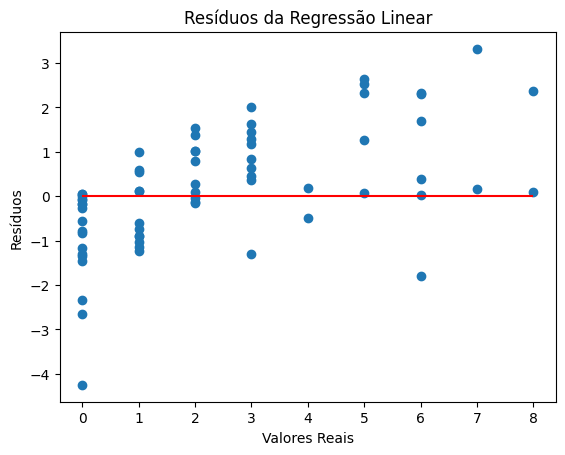

In [16]:
plt.scatter(y_test, y_test - y_pred_linear)
plt.hlines(y=0, xmin=min(y_test), xmax=max(y_test), color='red')
plt.xlabel('Valores Reais')
plt.ylabel('Resíduos')
plt.title('Resíduos da Regressão Linear')
plt.show()


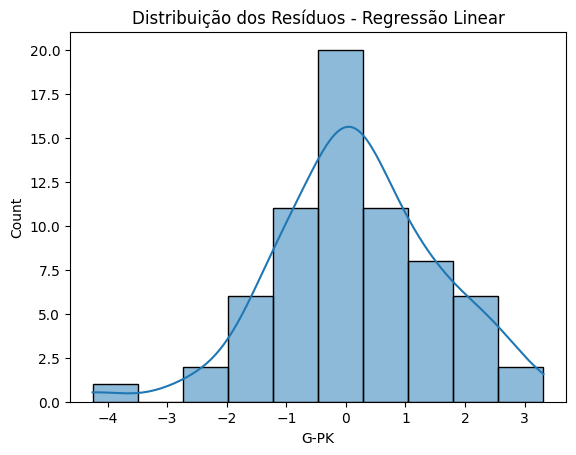

In [17]:
sns.histplot(y_test - y_pred_linear, kde=True)
plt.title('Distribuição dos Resíduos - Regressão Linear')
plt.show()

- O gráfico sugere que o modelo está razoavelmente ajustado, mas com uma leve assimetria negativa e alguns possíveis outliers à esquerda.

### **2. Criar modelos de classificação para  (ATACANTE)**

NameError: name 'X_scaled' is not defined

In [19]:
# Padronizar os dados para clusterização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(striker[['PrgR','xG','xAG','G-PK','Assistencias','Acoes Ofensivas','Aerial Duel Won','Aerial Duel Lost']])

# Definir e ajustar o modelo K-Means
kmeans = KMeans(n_clusters=5, init='random', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adicionar os clusters ao DataFrame
striker['Cluster'] = clusters

# Exibir os jogadores com seus clusters
print(striker[['PrgR','xG','xAG','G-PK','Assistencias','Cluster']])

     PrgR   xG  xAG  G-PK  Assistencias  Cluster
0     121  3.1  2.2     4             1        3
4     114  3.7  4.1     0             4        3
5      96  1.5  1.8     1             0        1
7      39  3.5  1.4     2             1        4
8      36  1.6  2.4     1             3        3
..    ...  ...  ...   ...           ...      ...
703     8  0.3  0.4     0             0        1
705   114  3.5  3.4     5             5        0
708    91  2.4  1.6     1             0        1
713    10  0.2  0.5     0             1        1
717    40  3.8  1.0     5             1        4

[221 rows x 6 columns]


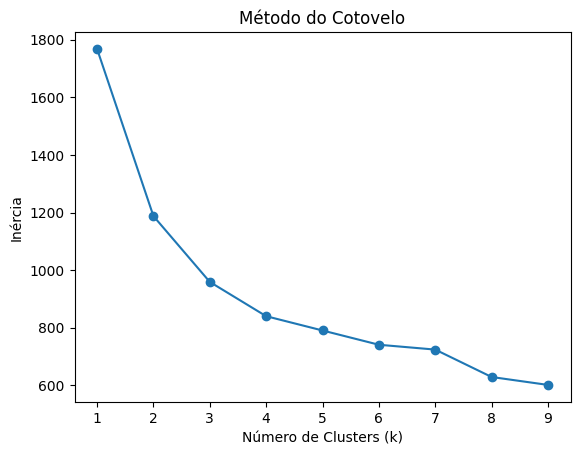

In [22]:
#Avaliar o Número de Clusters
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

In [20]:
# Calcular as médias de cada cluster apenas para colunas numéricas
cluster_summary = striker.groupby('Cluster').agg({col: 'mean' for col in striker.select_dtypes(include=['number']).columns})
print(cluster_summary)

             Minutos        PrgR        xG       xAG      G-PK  Assistencias  \
Cluster                                                                        
0        2216.684211  137.263158  4.421053  4.726316  4.736842      5.526316   
1         1143.85567   36.762887  1.172165  0.845361  0.865979      0.917526   
2        2063.136364  143.681818  7.504545  2.281818  6.909091      2.636364   
3        1461.352941  101.372549  2.701961  2.427451  2.823529      2.294118   
4         1314.96875       61.75     3.725  1.196875   3.53125        1.0625   

              PrgC        PrgP  Aerial Duel%  Aerial Duel Won  \
Cluster                                                         
0        57.421053  148.315789     34.210526        13.473684   
1         16.43299   53.958763     43.871134         11.85567   
2        40.727273   50.272727     43.559091        45.318182   
3        43.058824   70.352941     35.376471        10.901961   
4            16.75    37.03125         38.45     

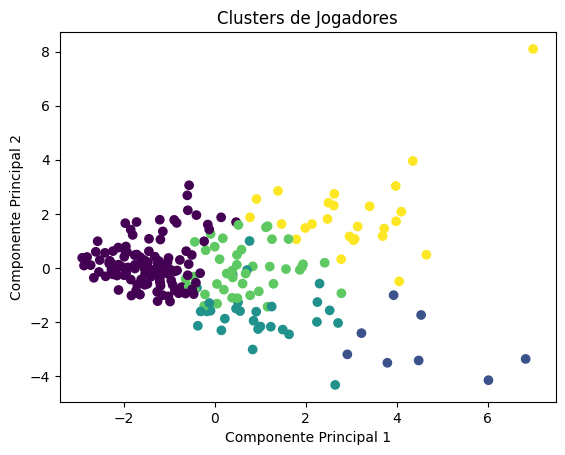

In [40]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters de Jogadores')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


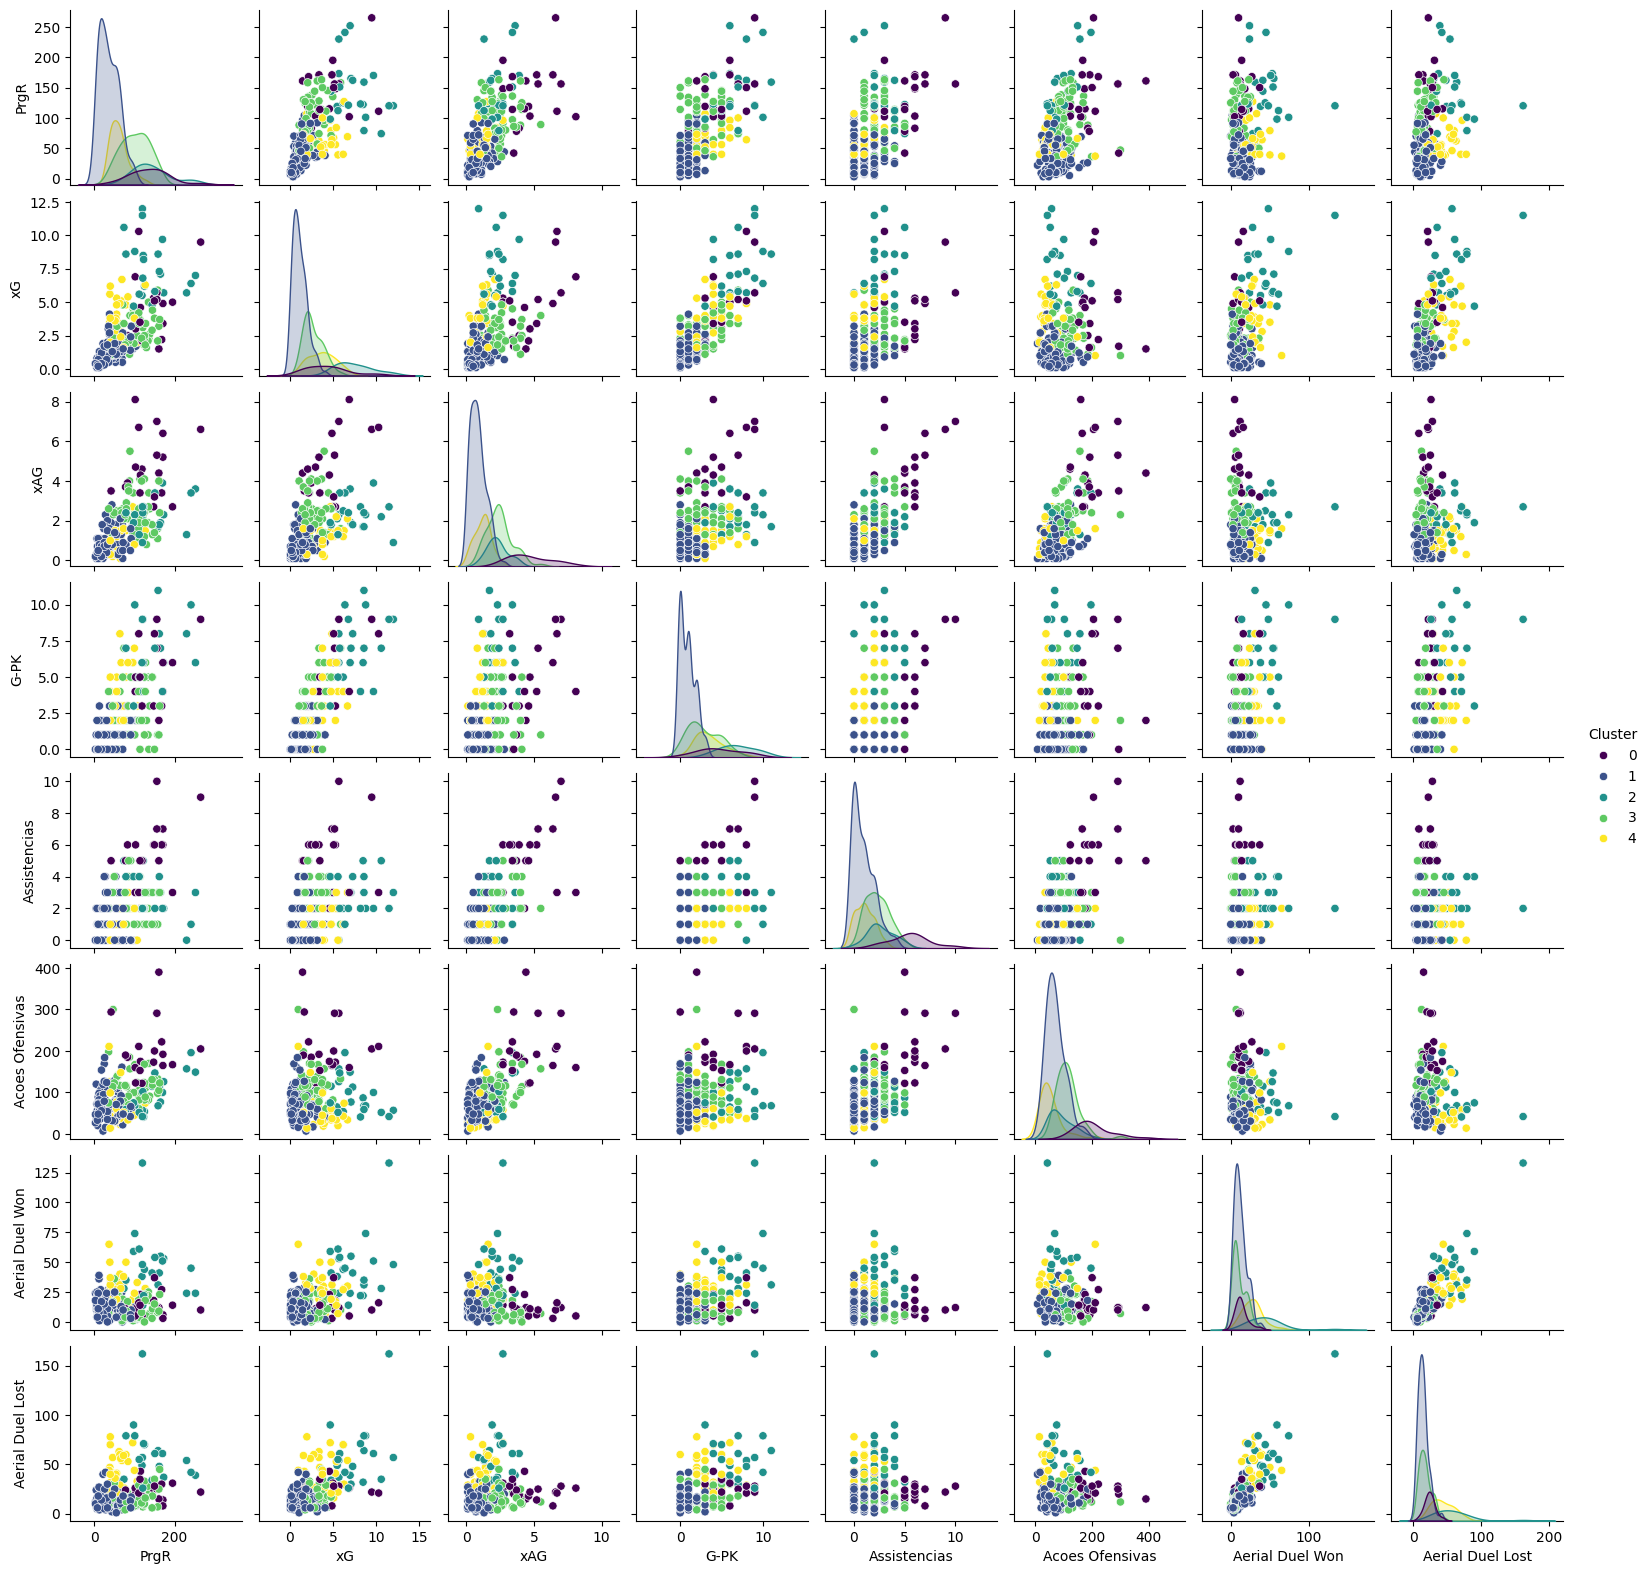

In [21]:
# Adicionar as métricas e o cluster ao DataFrame para visualização
metrics = ['PrgR','xG','xAG','G-PK','Assistencias','Acoes Ofensivas','Aerial Duel Won','Aerial Duel Lost','Cluster']

# Plotar o pair plot para todas as métricas
sns.pairplot(striker[metrics], hue='Cluster', palette='viridis', diag_kind='kde', height=2)
plt.show()



## Comportamento entre Variáveis
- PrgR vs G-PK (Gols sem Pênalti)
A relação sugere que jogadores que recebem mais passes progressivos também têm mais chances de marcar gols.
Cluster 3 é um destaque aqui, indicando jogadores com alta produtividade ofensiva: recebem passes em progressão e convertem essas oportunidades em gols.

- xG vs. xAG:

Existe uma correlação positiva clara entre essas variáveis. Jogadores ou times que criam oportunidades (xAG) tendem a ter uma alta expectativa de gols (xG). Isso é consistente com a ideia de que bons passadores estão relacionados à criação de chances claras de gol.

- PrgR vs. Ações Ofensivas:

Há uma correlação moderada entre PrgR e Ações Ofensivas. Embora jogadores que avancem a bola contribuam ofensivamente, existem exceções (pontos com alta ação ofensiva, mas baixa PrgR). Isso pode indicar estilos de jogo diferentes — alguns jogadores participam sem conduzir muito a bola

- G-PK vs. xG:

A correlação positiva faz sentido, pois a expectativa de gol (xG) tende a ser maior para jogadores que marcam mais gols, mesmo excluindo pênaltis. Clusters com valores altos indicam jogadores eficientes na finalização, enquanto clusters com baixo xG e G-PK podem apontar jogadores com menor participação em finalizações.

- Assistências vs. xAG:

Embora esperemos uma forte correlação entre assistências e assistências esperadas, há alguns pontos que se destacam por terem alto valor de assistências, mas baixo xAG. Isso pode indicar jogadores que têm poucos passes decisivos esperados, mas ainda assim conseguem criar gols

- PrgR vs Assistências e xA (Expected Assists)
A correlação entre passes recebidos em progressão e assistências/xA é menos evidente. Isso sugere que os jogadores que recebem essas bolas em profundidade podem finalizar as jogadas por si mesmos, sem depender tanto de passes finais.
Esse comportamento é típico de jogadores que são finalizadores, como pontas ou atacantes centrais, que recebem a bola já em posição avançada

- Aerial Duel Won vs Aerial Duel Lost:
Existe um comportamento curioso em que alguns clusters têm muitos duelos perdidos e poucos ganhos, enquanto outros apresentam equilíbrio.
O Cluster 0 parece conter jogadores mais fracos em duelos aéreos, enquanto o Cluster 1 pode ser mais equilibrado em termos de ganho e perda.
---



## Distribuição dos Clusters

- Cluster 0 (Roxo):

Representa **meias ofensivos ou atacantes versáteis**, que são extremamente ativos tanto na criação quanto na finalização. Eles recebem muitos passes em progressão e geram oportunidades (xAG alto). Participam frequentemente em duelos aéreos, mas com uma taxa moderada de sucesso.


- Cluster 1 (Azul):

Agrupa **meio-campistas de apoio**, que contribuem para a construção do jogo, mas sem muito destaque na criação ou finalização. São jogadores que equilibram sua participação entre a transição ofensiva e defensiva, mas não se sobressaem em nenhuma das fases.

- Cluster 2 (Verde):

Este grupo é composto por **atacantes finalizadores**, com alta capacidade de converter oportunidades em gols. Eles recebem muitos passes em profundidade e se destacam pela eficiência nos duelos aéreos. No entanto, não são muito envolvidos na criação de jogadas (xAG relativamente baixo).

- Cluster 3 (Amarelo):

Este cluster agrupa **defensores ou volantes** que têm pouco impacto ofensivo, com baixas métricas de criação e finalização. Embora participem em algumas disputas aéreas, sua função principal é claramente defensiva.

- Cluster 4 (Preto):

Este cluster pode representar **defensores centrais ou atacantes físicos**, que têm alguma capacidade de marcar gols (G-PK razoável), especialmente em situações de bola parada. Eles se destacam nos duelos aéreos, mas também perdem muitos, sugerindo que são constantemente alvos de cruzamentos e disputas físicas.


In [23]:
cluster_names = {
    0: 'mei ata versateis',
    1: 'mei apoio',
    2: 'ata fin',
    3: 'def vol',
    4: 'zag ata fisico'
}

# Adicionar nomes ao DataFrame
striker['Perfil'] = striker['Cluster'].map(cluster_names)

# Exibir os primeiros jogadores com seus perfis
print(striker[['PrgR','xG','xAG','G-PK','Assistencias','Acoes Ofensivas','Perfil']].head())

   PrgR   xG  xAG  G-PK  Assistencias  Acoes Ofensivas          Perfil
0   121  3.1  2.2     4             1               95         def vol
4   114  3.7  4.1     0             4              114         def vol
5    96  1.5  1.8     1             0               69       mei apoio
7    39  3.5  1.4     2             1              126  zag ata fisico
8    36  1.6  2.4     1             3              198         def vol


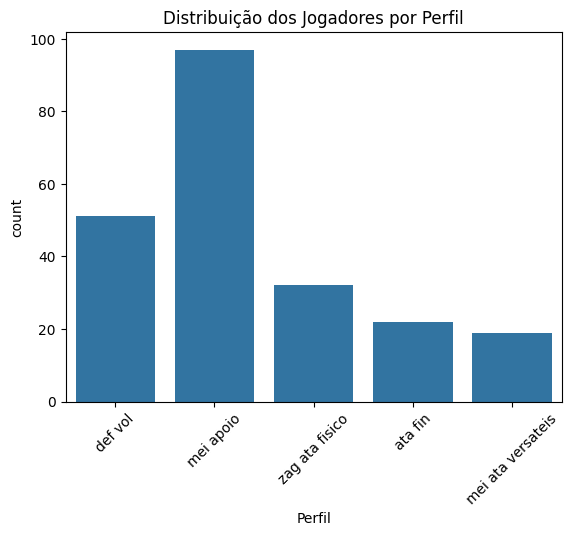

In [24]:
sns.countplot(data=striker, x='Perfil')
plt.xticks(rotation=45)
plt.title('Distribuição dos Jogadores por Perfil')
plt.show()


In [29]:
# Função para exibir jogadores de um perfil específico
def exibir_jogadores_por_perfil(perfil_escolhido):
    # Filtrar os jogadores pelo perfil escolhido
    jogadores_filtrados = striker[striker['Perfil'] == perfil_escolhido]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado para o perfil: {perfil_escolhido}")
    else:
        print(f"\nJogadores no perfil: {perfil_escolhido}")
        print(jogadores_filtrados[['jogador','time','posicao', 'Minutos','PrgR','xG','xAG','G-PK','Assistencias','Acoes Ofensivas','Aerial Duel%',]])

# Exemplo: Exibir jogadores do perfil "Apoiadores Ofensivos"
# Definir a largura máxima e o número de colunas exibidas
pd.set_option('display.max_columns', None)  # Exibir todas as colunas
pd.set_option('display.width', 1000)        # Aumentar a largura da tabela
perfil_escolhido = "ata fin"  # Altere conforme necessário
exibir_jogadores_por_perfil(perfil_escolhido)



Jogadores no perfil: ata fin
              jogador                 time posicao  Minutos  PrgR    xG  xAG  G-PK  Assistencias  Acoes Ofensivas  Aerial Duel%
15            Julimar       Ath Paranaense   FW,MF     1665   173   5.7  2.3     6             2        32.307692        73.625
53      Luiz Fernando       Atl Goianiense   FW,MF     2591   230   5.7  1.3     8             0         40.25641          38.5
86               Hulk     Atlético Mineiro   FW,MF     1716   122   8.5  1.7     6             5        22.307692        50.875
115     Everaldo Stum                Bahia      FW     2023   165   7.1  1.9     7             3         19.74359        80.875
131          Thaciano                Bahia   FW,MF     2232   119   5.5  2.1     6             2        16.666667        54.625
152              Igor        Botafogo (RJ)      FW     1284   125   6.2  2.5     5             2        13.846154         48.25
160     Luiz Henrique        Botafogo (RJ)   FW,MF     2380   252   7.0  3

In [28]:
# Dicionário dos peso para cada métrica
pesos = {
    'PrgR': 4,
    'xG': 5,
    'xAG': 4,
    'G-PK': 10.0,
    'Assistencias': 3,
    'Acoes Ofensivas': 2,
    'Aerial Duel%': 2
}

# Função para normalizar uma métrica com base no valor máximo
def normalizar(coluna):
    return coluna / coluna.max()

# Normalizando 'Acoes Ofensivas' e 'Aerial Duel%'
striker['Acoes Ofensivas'] = normalizar(striker['Acoes Ofensivas']) * 100
striker['Aerial Duel%'] = normalizar(striker['Aerial Duel%']) * 100

# Calculando as pontuações individuais para cada métrica
for coluna, peso in pesos.items():
    striker[coluna + '_Pontuacao'] = striker[coluna] * peso

# Calculando a pontuação total
colunas_pontuacao = [coluna + '_Pontuacao' for coluna in pesos.keys()]
striker['Pontuacao_Total'] = striker[colunas_pontuacao].sum(axis=1)

# **Normalizando a pontuação total para o intervalo [0, 100]**
min_pontuacao = striker['Pontuacao_Total'].min()
max_pontuacao = striker['Pontuacao_Total'].max()
striker['Pontuacao'] = (
    (striker['Pontuacao_Total'] - min_pontuacao) / (max_pontuacao - min_pontuacao)
) * 100

# Filtrando os jogadores por perfil desejado e ordenando pelo total normalizado
perfil_escolhido = 'ata fin'
jogadores_filtrados = striker[striker['Perfil'] == perfil_escolhido]
jogadores_ordenados = jogadores_filtrados.sort_values(by='Pontuacao', ascending=False)

# Adicionando uma coluna de ranking
jogadores_ordenados['Ranking'] = range(1, len(jogadores_ordenados) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = jogadores_ordenados[['Ranking','time','posicao', 'jogador', 'Perfil', 'Pontuacao']]

# Imprimindo o resultado final no console
print("\nRanking de jogadores no perfil:", perfil_escolhido)
print(resultado_final.to_string(index=False))


Ranking de jogadores no perfil: ata fin
 Ranking                time posicao          jogador  Perfil  Pontuacao
       1       Internacional   FW,MF           Wesley ata fin   92.83174
       2       Botafogo (RJ)   FW,MF    Luiz Henrique ata fin  89.376689
       3      Atl Goianiense   FW,MF    Luiz Fernando ata fin  81.043914
       4      Ath Paranaense   FW,MF          Julimar ata fin  66.721691
       5               Bahia      FW    Everaldo Stum ata fin  64.832192
       6            Criciúma      FW  Yannick Bolasie ata fin   62.77032
       7              Cuiabá      FW     Isidro Pitta ata fin  62.632541
       8         Corinthians      FW     Yuri Alberto ata fin  59.984063
       9           Juventude      FW    Lucas Barbosa ata fin  59.540533
      10            Flamengo   FW,MF   Bruno Henrique ata fin  54.895572
      11       Internacional      FW     Rafael Borré ata fin  49.448638
      12       Vasco da Gama      FW    Pablo Vegetti ata fin  48.864331
      13  

In [30]:
# Filtrando os jogadores pelo perfil escolhido
perfil_escolhido = 'ata fin'  # Defina o perfil desejado
jogadores_filtrados = striker[striker['Perfil'] == perfil_escolhido].copy()

# Lista com os nomes dos jogadores disponíveis
jogadores_disponiveis = jogadores_filtrados['jogador'].tolist()

# Dicionário para armazenar os valores de mercado inseridos
valores_mercado = {}

# Loop para inserir manualmente os jogadores e seus valores
print(f"Jogadores disponíveis no perfil '{perfil_escolhido}': {jogadores_disponiveis}")

while jogadores_disponiveis:
    # Input para selecionar o jogador
    jogador_escolhido = input("Digite o nome do jogador (ou 'sair' para finalizar): ")

    # Verifica se o nome inserido é válido ou finaliza o processo
    if jogador_escolhido.lower() == 'sair':
        break
    elif jogador_escolhido not in jogadores_disponiveis:
        print("Jogador não encontrado. Tente novamente.")
        continue

    # Input para inserir o valor de mercado
    while True:
        try:
            valor = float(input(f"Insira o valor de mercado para {jogador_escolhido} (€M): "))
            valores_mercado[jogador_escolhido] = valor  # Armazena o valor inserido
            jogadores_disponiveis.remove(jogador_escolhido)  # Remove da lista de disponíveis
            break
        except ValueError:
            print("Valor inválido. Por favor, insira um número válido.")

# Adicionando os valores de mercado ao DataFrame
jogadores_filtrados['Valor de Mercado (€M)'] = jogadores_filtrados['jogador'].map(valores_mercado)

# Calculando o custo por ponto
jogadores_filtrados['Custo por Ponto (€M)'] = (
    jogadores_filtrados['Valor de Mercado (€M)'] / jogadores_filtrados['Pontuacao']
)

# Calculando o Score de valor
jogadores_filtrados['Score de Valor'] = (
    jogadores_filtrados['Pontuacao'] / jogadores_filtrados['Valor de Mercado (€M)']
)

# Ordenando pelo maior Score de valor
resultado_final = jogadores_filtrados.sort_values(by='Score de Valor', ascending=False)

# Adicionando a coluna de ranking
resultado_final['Ranking'] = range(1, len(resultado_final) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = resultado_final[
    ['Ranking', 'jogador', 'Valor de Mercado (€M)', 'Pontuacao', 'Custo por Ponto (€M)', 'Score de Valor']
]

# Exibindo o resultado final
print("\nRanking de jogadores por eficiência de valor:")
print(resultado_final.to_string(index=False))


Jogadores disponíveis no perfil 'ata fin': ['Julimar', 'Luiz Fernando', 'Hulk', 'Everaldo Stum', 'Thaciano', 'Igor', 'Luiz Henrique', 'Yuri Alberto', 'Yannick Bolasie', 'Isidro Pitta', 'Bruno Henrique', 'Pedro', 'Rafael Borré', 'Wesley', 'Lucas Barbosa', 'José López', 'Rony', 'Eduardo Sasha', 'Jonathan Calleri', 'Luciano', 'Pablo Vegetti', 'Alerrandro']
Digite o nome do jogador (ou 'sair' para finalizar): Julimar
Insira o valor de mercado para Julimar (€M): 0.4
Digite o nome do jogador (ou 'sair' para finalizar): Luiz Fernando
Insira o valor de mercado para Luiz Fernando (€M): 1.5
Digite o nome do jogador (ou 'sair' para finalizar): Hulk
Insira o valor de mercado para Hulk (€M): 1.8
Digite o nome do jogador (ou 'sair' para finalizar): Everaldo Stum
Insira o valor de mercado para Everaldo Stum (€M): 0.65
Digite o nome do jogador (ou 'sair' para finalizar): Thaciano
Insira o valor de mercado para Thaciano (€M): 2
Digite o nome do jogador (ou 'sair' para finalizar): Igor
Insira o valor de


Jogadores selecionados: Wesley, Isidro Pitta, Wesley, Lucas Barbosa, Alerrandro
     PrgR   xG  xAG  G-PK  Assistencias  Acoes Ofensivas  Minutos
213   124  1.8  2.4     2             1        31.794872     1438
302   170  9.7  3.9     4             2        25.641026     2755
496   241  6.4  3.4    10             1         50.25641     2356
516   151  5.8  3.4     7             2        37.692308     2282
678    79  8.6  2.4     7             4        15.128205     2117


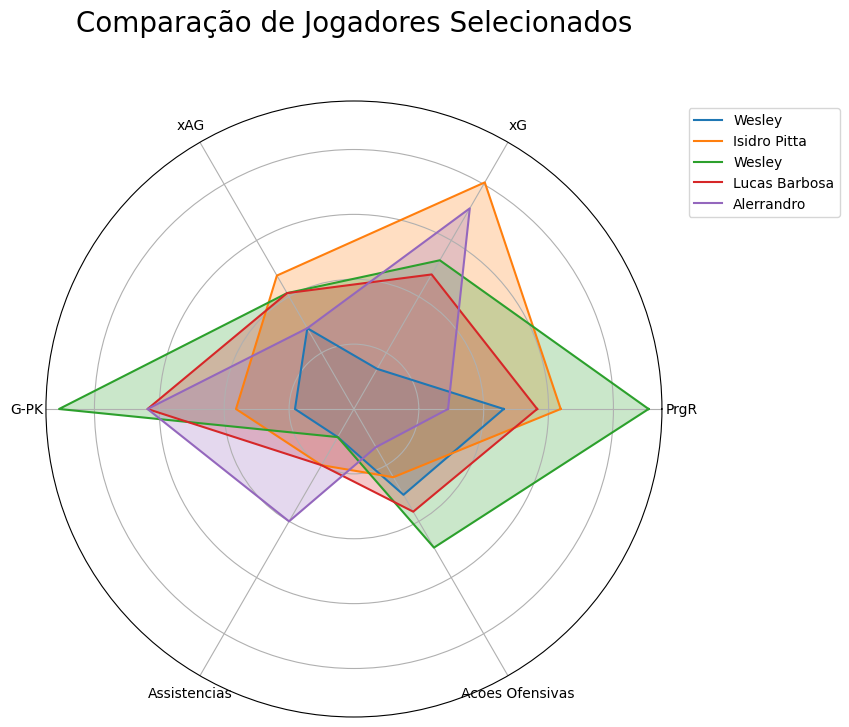

In [31]:
def radar_chart_por_jogadores(jogadores_selecionados, df):
    # Filtrar os jogadores pelos nomes inseridos
    jogadores_filtrados = df[df['jogador'].isin(jogadores_selecionados)]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado nos nomes fornecidos: {jogadores_selecionados}")
        return

    print(f"\nJogadores selecionados: {', '.join(jogadores_filtrados['jogador'])}")
    print(jogadores_filtrados[['PrgR', 'xG', 'xAG', 'G-PK', 'Assistencias', 'Acoes Ofensivas', 'Minutos']])

    # Definir as métricas a serem exibidas no radar
    metricas = ['PrgR', 'xG', 'xAG', 'G-PK', 'Assistencias', 'Acoes Ofensivas']
    num_vars = len(metricas)

    # Normalizar as métricas para todas ficarem na escala [0, 1]
    jogadores_normalizados = jogadores_filtrados.copy()
    for metrica in metricas:
        min_val = df[metrica].min()
        max_val = df[metrica].max()
        jogadores_normalizados[metrica] = (jogadores_filtrados[metrica] - min_val) / (max_val - min_val)

    # Ângulos para o gráfico radar
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Fechar o círculo

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Loop pelos jogadores selecionados
    for i, row in jogadores_normalizados.iterrows():
        valores = row[metricas].tolist()
        valores += valores[:1]  # Fechar o círculo

        # Plotar a linha e o preenchimento para o jogador
        ax.plot(angles, valores, label=row['jogador'])
        ax.fill(angles, valores, alpha=0.25)

    # Configurações do gráfico
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metricas)

    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.title('Comparação de Jogadores Selecionados', size=20, color='black', y=1.1)
    plt.show()

# Exemplo de uso: Insira os nomes dos jogadores que deseja comparar
jogadores_selecionados = ['Wesley', 'Isidro Pitta','Alerrandro','Lucas Barbosa']  # Altere conforme necessário
radar_chart_por_jogadores(jogadores_selecionados, striker)